# K-Means Clustering

## K-Means clustering step-by-step

**Clustering into 2 clusters:**

<div>
<img src="./pic/kmeans_k_2_demo.gif" width="500"/>
</div>

**Clustering into 3 clusters:**

<div>
<img src="./pic/kmeans_k_3_demo.gif" width="500"/>
</div>

**Clustering into 4 clusters:**

<div>
<img src="./pic/kmeans_k_4_demo.gif" width="500"/>
</div>

## The Elbow method in clustering

![](./pic/elbow.png)

### Within-Cluster Sum of Squares (WCSS)

The formula for calculating WCSS is as follows:

$$
WCSS = \sum_{i=1}^{k} \sum_{j=1}^{n_i} \| P_j^{(i)} - C_i \|^2
$$

### Explanation of Terms
- **$k$**: The number of clusters.
- **$n_i$**: The number of points in cluster $i$.
- **$P_j^{(i)}$**: The $j$-th data point in cluster $i$.
- **$C_i$**: The centroid (mean point) of cluster $i$.
- **$\| P_j^{(i)} - C_i \|^2$**: The squared Euclidean distance between the point $P_j^{(i)}$ and the centroid $C_i$.

### Purpose
WCSS measures the compactness of clusters by summing up the squared distances of data points from their respective cluster centroids. It is used in the **Elbow Method** to determine the optimal number of clusters by identifying the point where adding more clusters provides diminishing returns in reducing WCSS.


## K-Means++

#### **Step 1: Choose the first centroid**
Randomly select the first centroid from the set of all data points.

#### **Step 2: Compute distances**
For each data point, calculate the distance to the nearest already-selected centroid.\
The distance is the squared Euclidean distance:
     $$
     D(x_i, c) = ||x_i - c||^2
     $$

#### **Step 3: Probabilistic selection of the next centroid**
Select the next centroid based on a probability proportional to the squared distance:
     $$
     P(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^{n} D(x_j)^2}
     $$

#### **Step 4: Repeat for all centroids**
Repeat steps 2 and 3 until all $k$ centroids have been selected.

#### **Step 5: Run the K-Means algorithm**
Once the initial centroids are chosen, run the standard K-Means algorithm:
   - Assign data points to the nearest centroid.
   - Update centroids as the mean of the points assigned to each cluster.
   - Repeat until convergence.


## Goal

The goal is identify some customer patters in the data by applying K-Means algorithm.

## Dataset

Have a quick look at the dataset.

In [1]:
%cat ../00_data/Mall_Customers.csv | head

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6
0004,Female,23,16,77
0005,Female,31,17,40
0006,Female,22,17,76
0007,Female,35,18,6
0008,Female,23,18,94
0009,Male,64,19,3


In [2]:
%cat ../00_data/Mall_Customers.csv | tail

0191,Female,34,103,23
0192,Female,32,103,69
0193,Male,33,113,8
0194,Female,38,113,91
0195,Female,47,120,16
0196,Female,35,120,79
0197,Female,45,126,28
0198,Male,32,126,74
0199,Male,32,137,18
0200,Male,30,137,83

## Load the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
df = pd.read_csv('../00_data/Mall_Customers.csv', decimal='.', sep=',')

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
np.sum(df.isna(), axis=0)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Features

+ `Annual Income (k$) `
+ `Spending Score (1-100)`


In [8]:
X = df.iloc[:, [3, 4]].values

In [9]:
X[:10, :]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

## Features scaling

> **Important!** You should scale features before applying K-Means because it relies on Euclidean distance, and unscaled features with different ranges can disproportionately influence the clustering results.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled[:5, :]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## Find the optimal number of clusters

In [12]:
# init random seed
random_state = 42

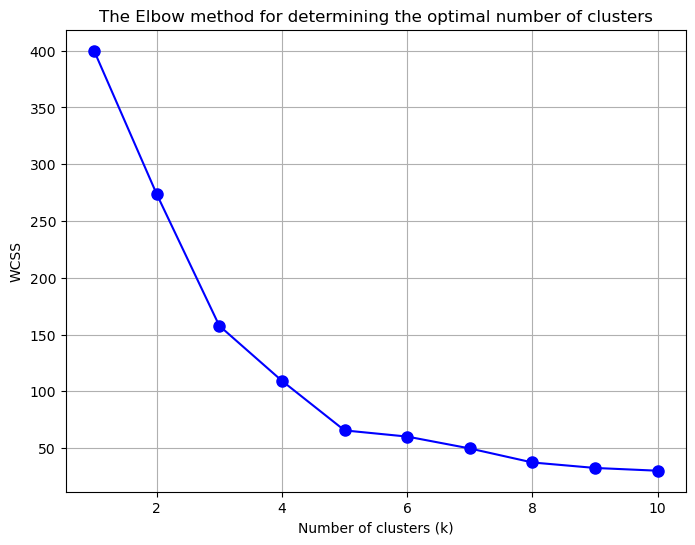

In [13]:
from sklearn.cluster import KMeans

wcss = []
K = range(1, 11)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters,
                   init="k-means++",
                   random_state=random_state)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow method for determining the optimal number of clusters')
plt.grid(True)
plt.show()

$K=5$ is the optimal number or clusters.

## Train the model on the dataset

In [14]:
kmeans = KMeans(n_clusters=5,
                   init="k-means++",
                   random_state=random_state)
clusters_pred = kmeans.fit_predict(X_scaled)

In [15]:
clusters_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [16]:
# centroids
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [17]:
# cluster labels
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

## Viz the clusters

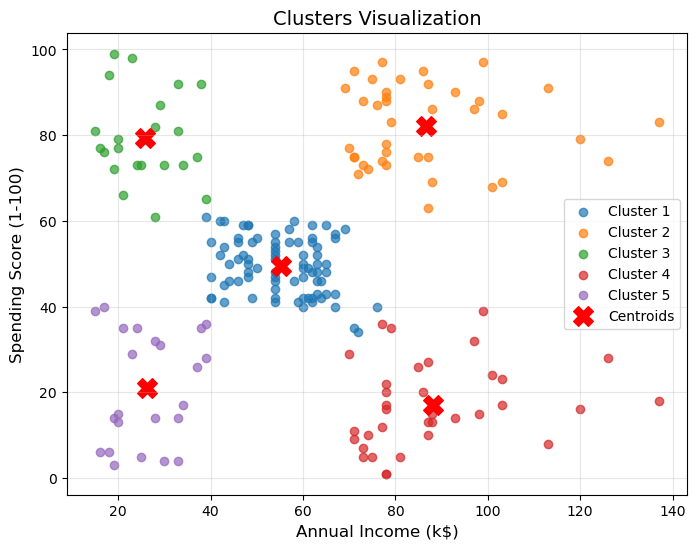

In [18]:
plt.figure(figsize=(8, 6))

for cluster_id in range(5):
    plt.scatter(X[kmeans.labels_ == cluster_id, 0], 
                X[kmeans.labels_ == cluster_id, 1], 
                label=f"Cluster {cluster_id+1}", alpha=0.7)

plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
            c='red', s=200, marker='X', label='Centroids')
plt.title("Clusters Visualization", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()